# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Linear Regression Approach

We are going to tackcle this problem with Linear Regression machine learnig techniques We have learnt so far,
This assignment will be divided into two braod sections ,

- Data understanding, preparation and EDA
  
- Model Building and evaluation

lets start with the assignment

In [1195]:
# Import required libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Data understanding, preparation and EDA

In [1196]:
# Read Data Set
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1197]:
#Rename the columns for better understanding
df_day.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
df_day.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1198]:
# Insepct various aspects of data frame
# check shape of data frame
df_day.shape

(730, 16)

In [1199]:
# check data type of columns
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   Year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1200]:
#Mapping variables season, month, weathersit, weekday

df_day['season']=df_day.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df_day['month']=df_day.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_day['weathersit']=df_day.weathersit.map({1: 'Clear',2:'Misty',3:'Light-SNow',4:'Foggy'})
df_day['weekday']=df_day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df_day.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### All columns are of numeric type and there are no null values present.

### Analyze multicollinearity and drop some columns

We are going to analyze the variables closely and try to find their correlation wth each other and target variable "cnt".
Based on statistical data we will drop some of the columns which can impact our model.
As we can see there are two columns "instant" and "dteday" which have no significance in analysis, can be dropped righ away. 


In [1201]:
# Dropping instant and dteday columns
df_day = df_day.drop(['instant','dteday'],axis =1)
df_day.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Identify Continuous and Categorical Features

In [1202]:
df_day.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
dtype: int64

### We can see there columns which have are categorical in nature like season, yr, holiday, workingday etc.

## Data Visualisation

### Visualising Numeric Features

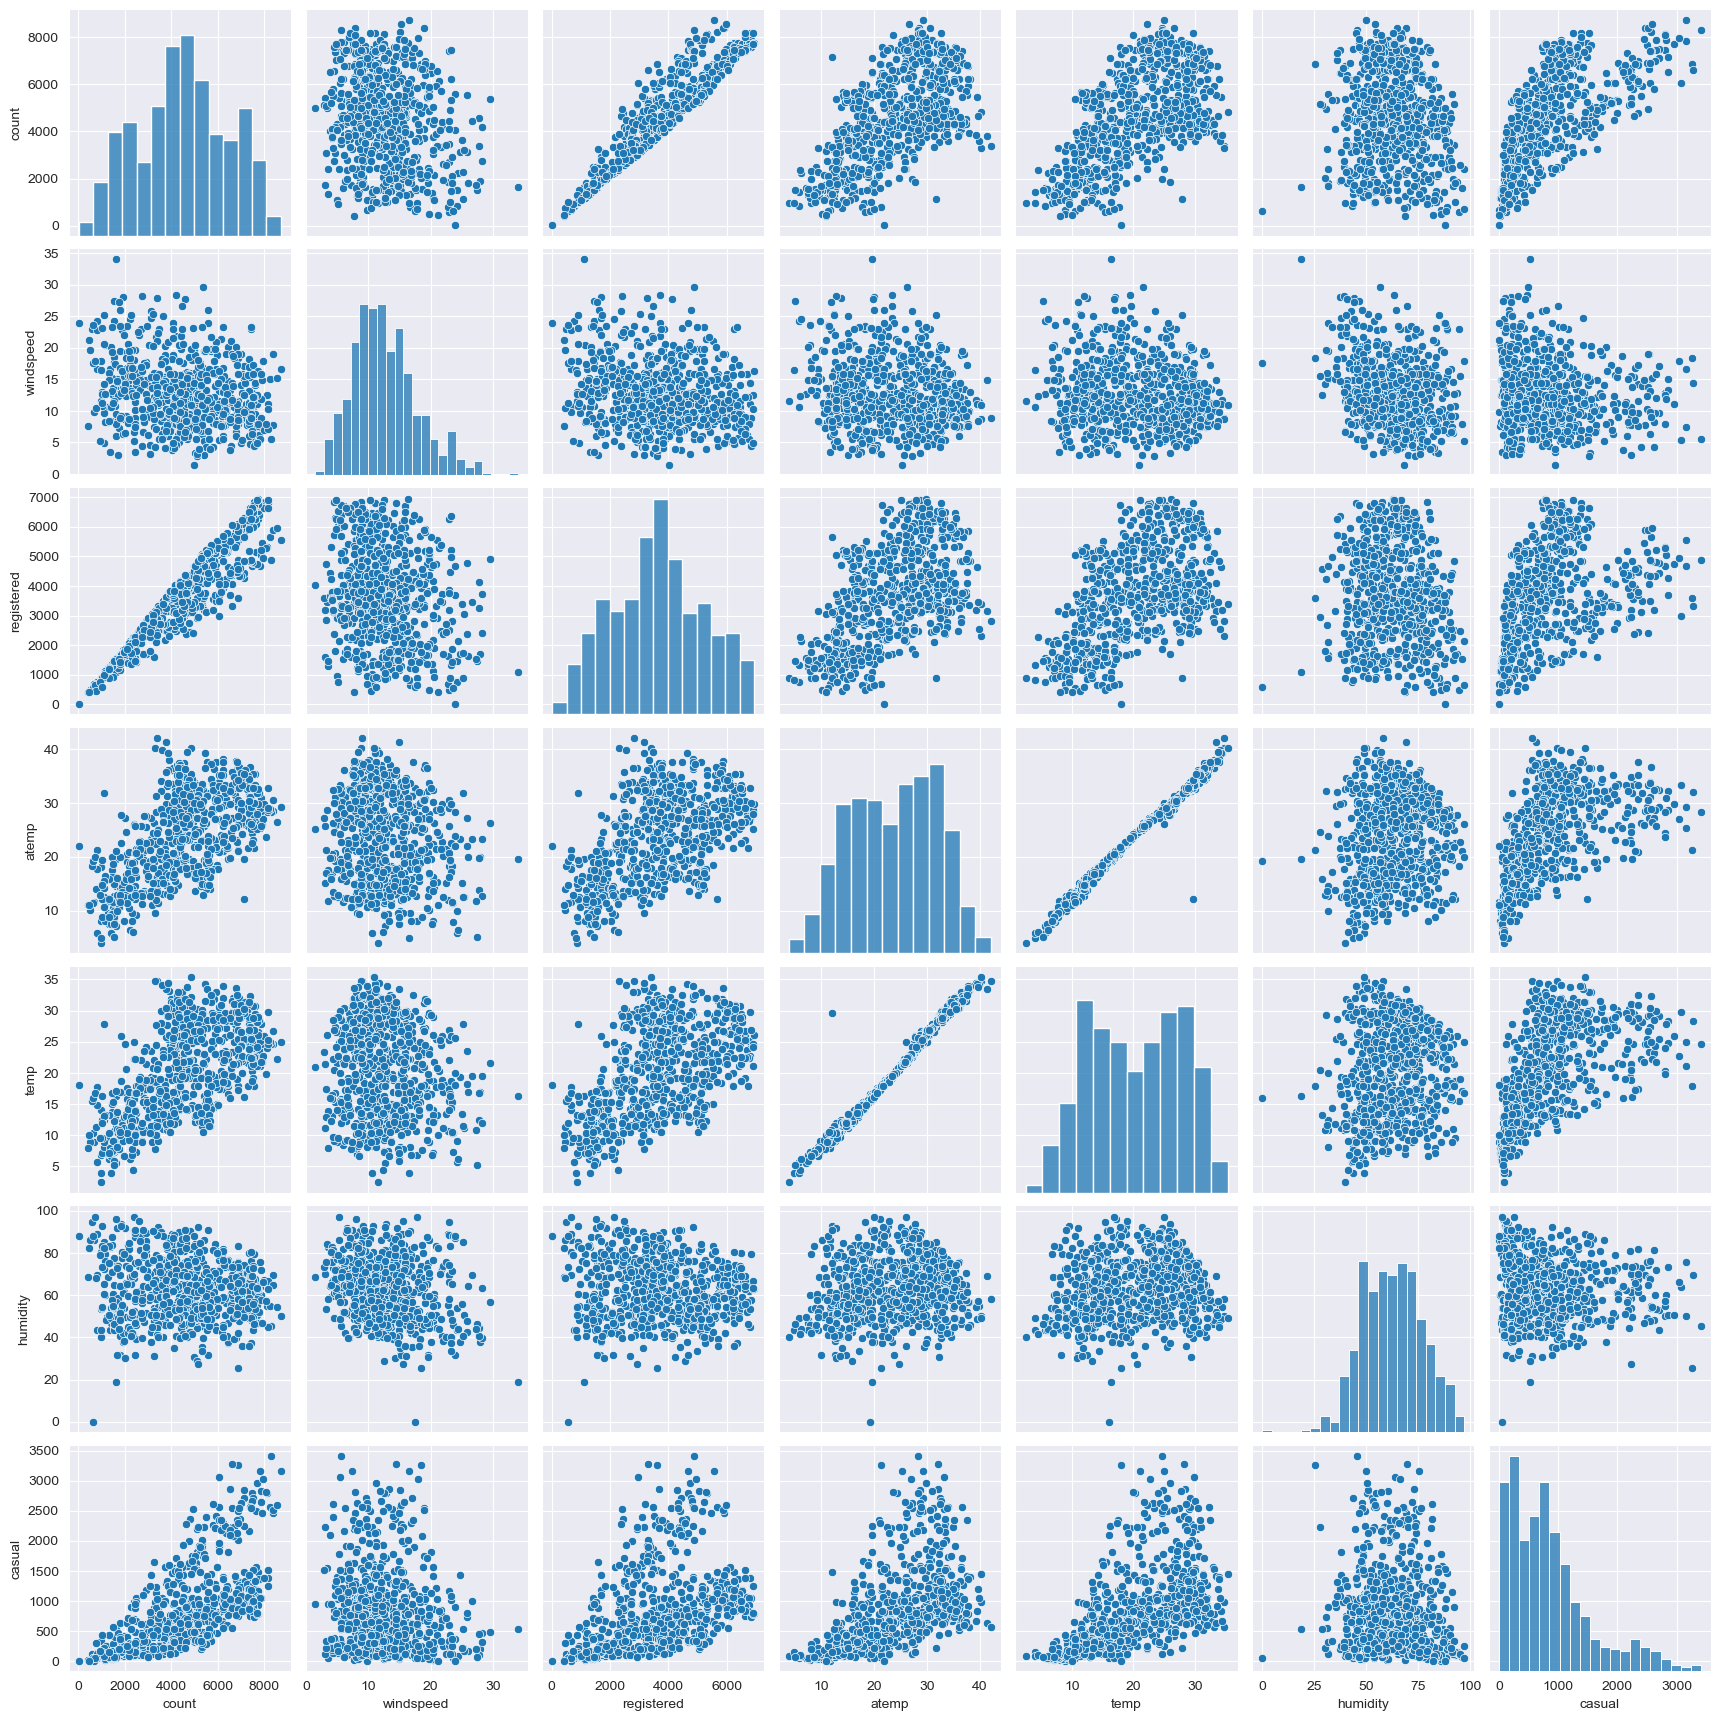

In [1203]:
#Pairplot for numeric variables
sns.pairplot(df_day, vars=['count','windspeed','registered','atemp',"temp", "humidity",'casual'])
plt.show()

### Observation

- Bike rental has linear relationship with temperature.

###  Visualise categorical Variables

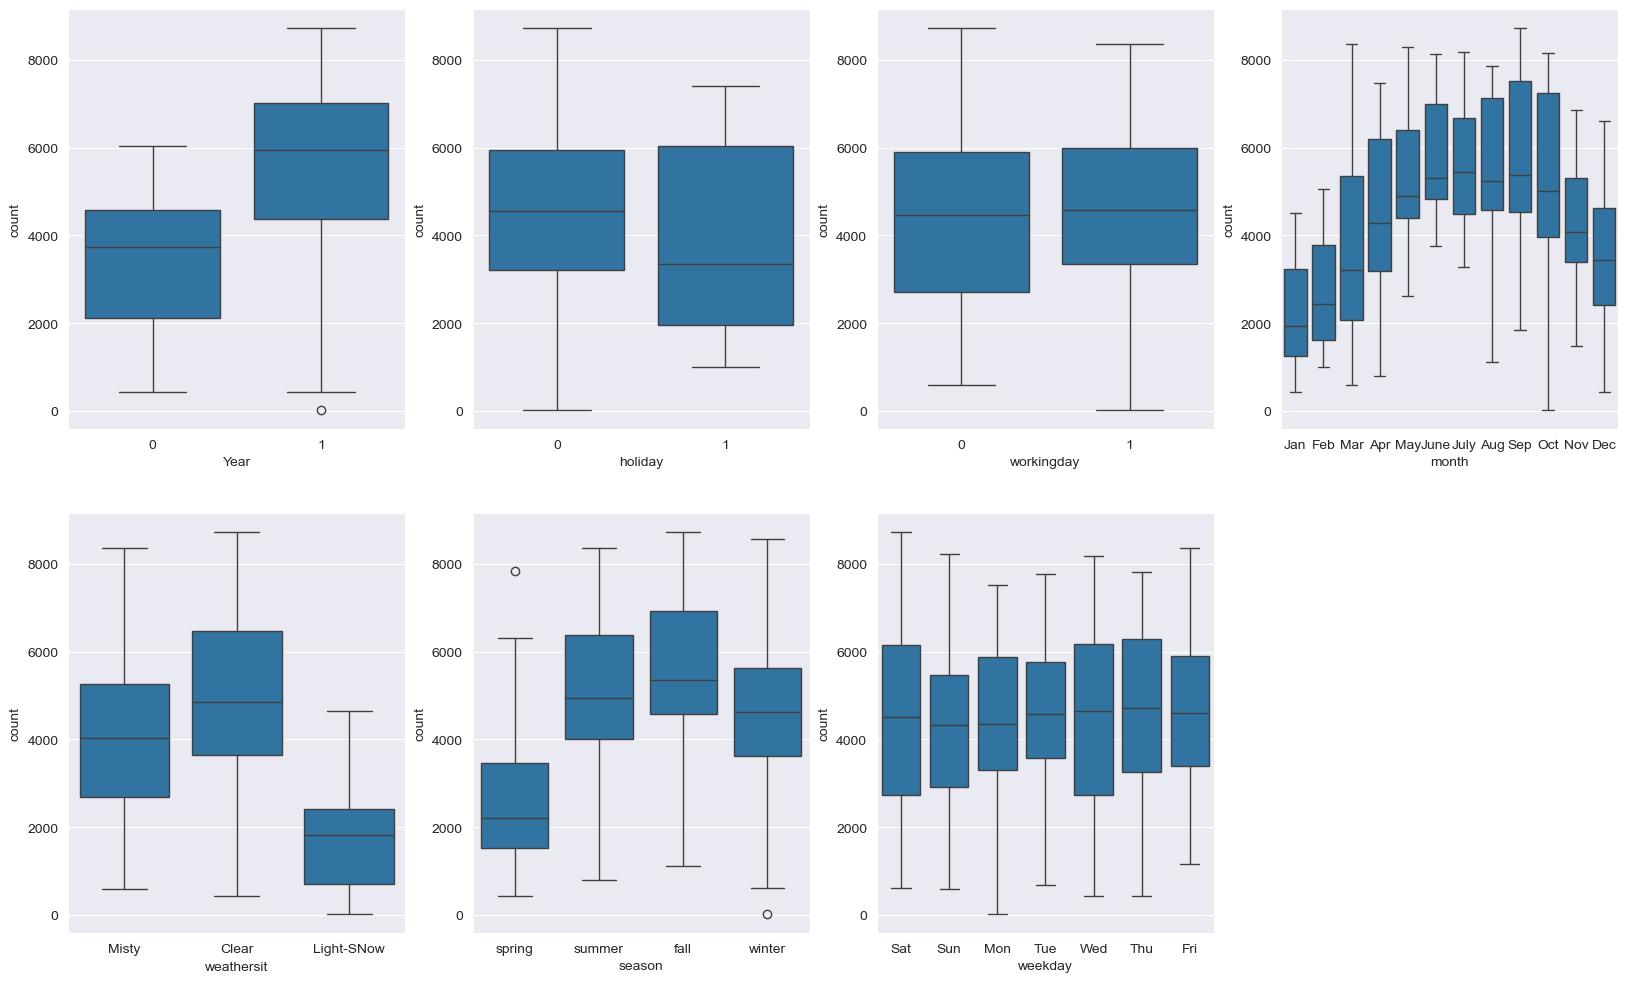

In [1204]:
##Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = df_day)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = df_day)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = df_day)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = df_day)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df_day)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = df_day)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = df_day)
plt.show()

### Observations

- Bike Rentals are more during the Fall season and then in summer
- Bike Rentals are more in the year 2019 compared to 2018
- Bike Rentals are more in partly cloudy weather
- Bike Rentals are more on Saturday,wednesday and thursday

### Visualise correlation between variables

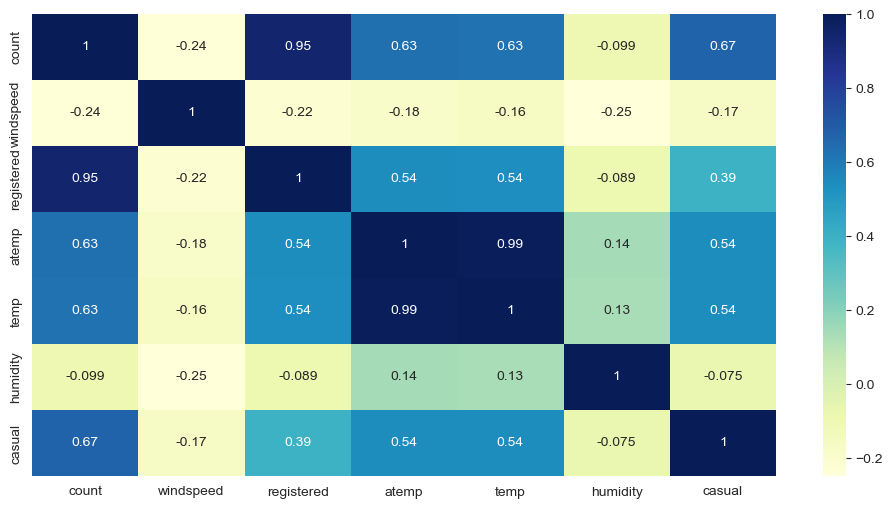

In [1205]:
plt.figure(figsize = (12,6))
sns.heatmap(df_day[['count','windspeed','registered','atemp',"temp", "humidity",'casual']].corr(),annot =True, cmap="YlGnBu")
plt.show()

### Observations

- temp and atemp are highly correlaed, one should be dropped
- casual and registered are higly correlated with target variable cnt and it is just sum of two, should be dropped

In [1206]:
# Dropping atemp, casual, registered
df_day = df_day.drop(['atemp','casual','registered'],axis =1)
df_day.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Data Prepration

### Create Dummy Variables

There are four categorical variables which have multiple levels, We are going to create dummy 
variables to represent each level numerically

- months
- weekdays
- season
- weather


In [1207]:
# create dummy variable for seasons
dm_seasons=pd.get_dummies(df_day.season,drop_first=True, dtype=int)
dm_seasons.sample(5)


,spring,summer,winter
294,0,0,1
629,0,0,0
14,1,0,0
93,0,1,0
25,1,0,0


- 000 will corresponds to fall
- 100 will corresponds to spring
- 010 will corresponds to summer
- 001 will corresponds to winter

In [1208]:
# create dummy variable for months
dm_months=pd.get_dummies(df_day.month,drop_first=True, dtype=int)

dm_months.sample(5)

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
242,1,0,0,0,0,0,0,0,0,0,0
550,0,0,0,0,1,0,0,0,0,0,0
444,0,0,0,0,0,0,1,0,0,0,0
718,0,1,0,0,0,0,0,0,0,0,0
418,0,0,1,0,0,0,0,0,0,0,0


In [1209]:
#create dummy variable for weekdays
dm_weekdays=pd.get_dummies(df_day.weekday,drop_first=True,dtype=int)
dm_weekdays.sample(7)

,Mon,Sat,Sun,Thu,Tue,Wed
364,0,1,0,0,0,0
334,0,0,0,1,0,0
535,0,0,0,0,0,1
257,0,0,0,1,0,0
532,0,0,1,0,0,0
259,0,1,0,0,0,0
475,0,1,0,0,0,0


In [1210]:
#create dummy variable for seather
dm_weather_sit=pd.get_dummies(df_day.weathersit,drop_first=True,dtype=int)
dm_weather_sit.sample(5)

,Light-SNow,Misty
162,0,0
236,0,1
61,0,0
522,0,0
362,0,0


In [1211]:
# Merge the results to the original data frame
df_day=pd.concat([df_day,dm_seasons,dm_months,dm_weekdays,dm_weather_sit],axis=1)
df_day.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-SNow,Misty
0,spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [1212]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
df_day.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df_day.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-SNow,Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1213]:
# check shape
df_day.shape

(730, 29)

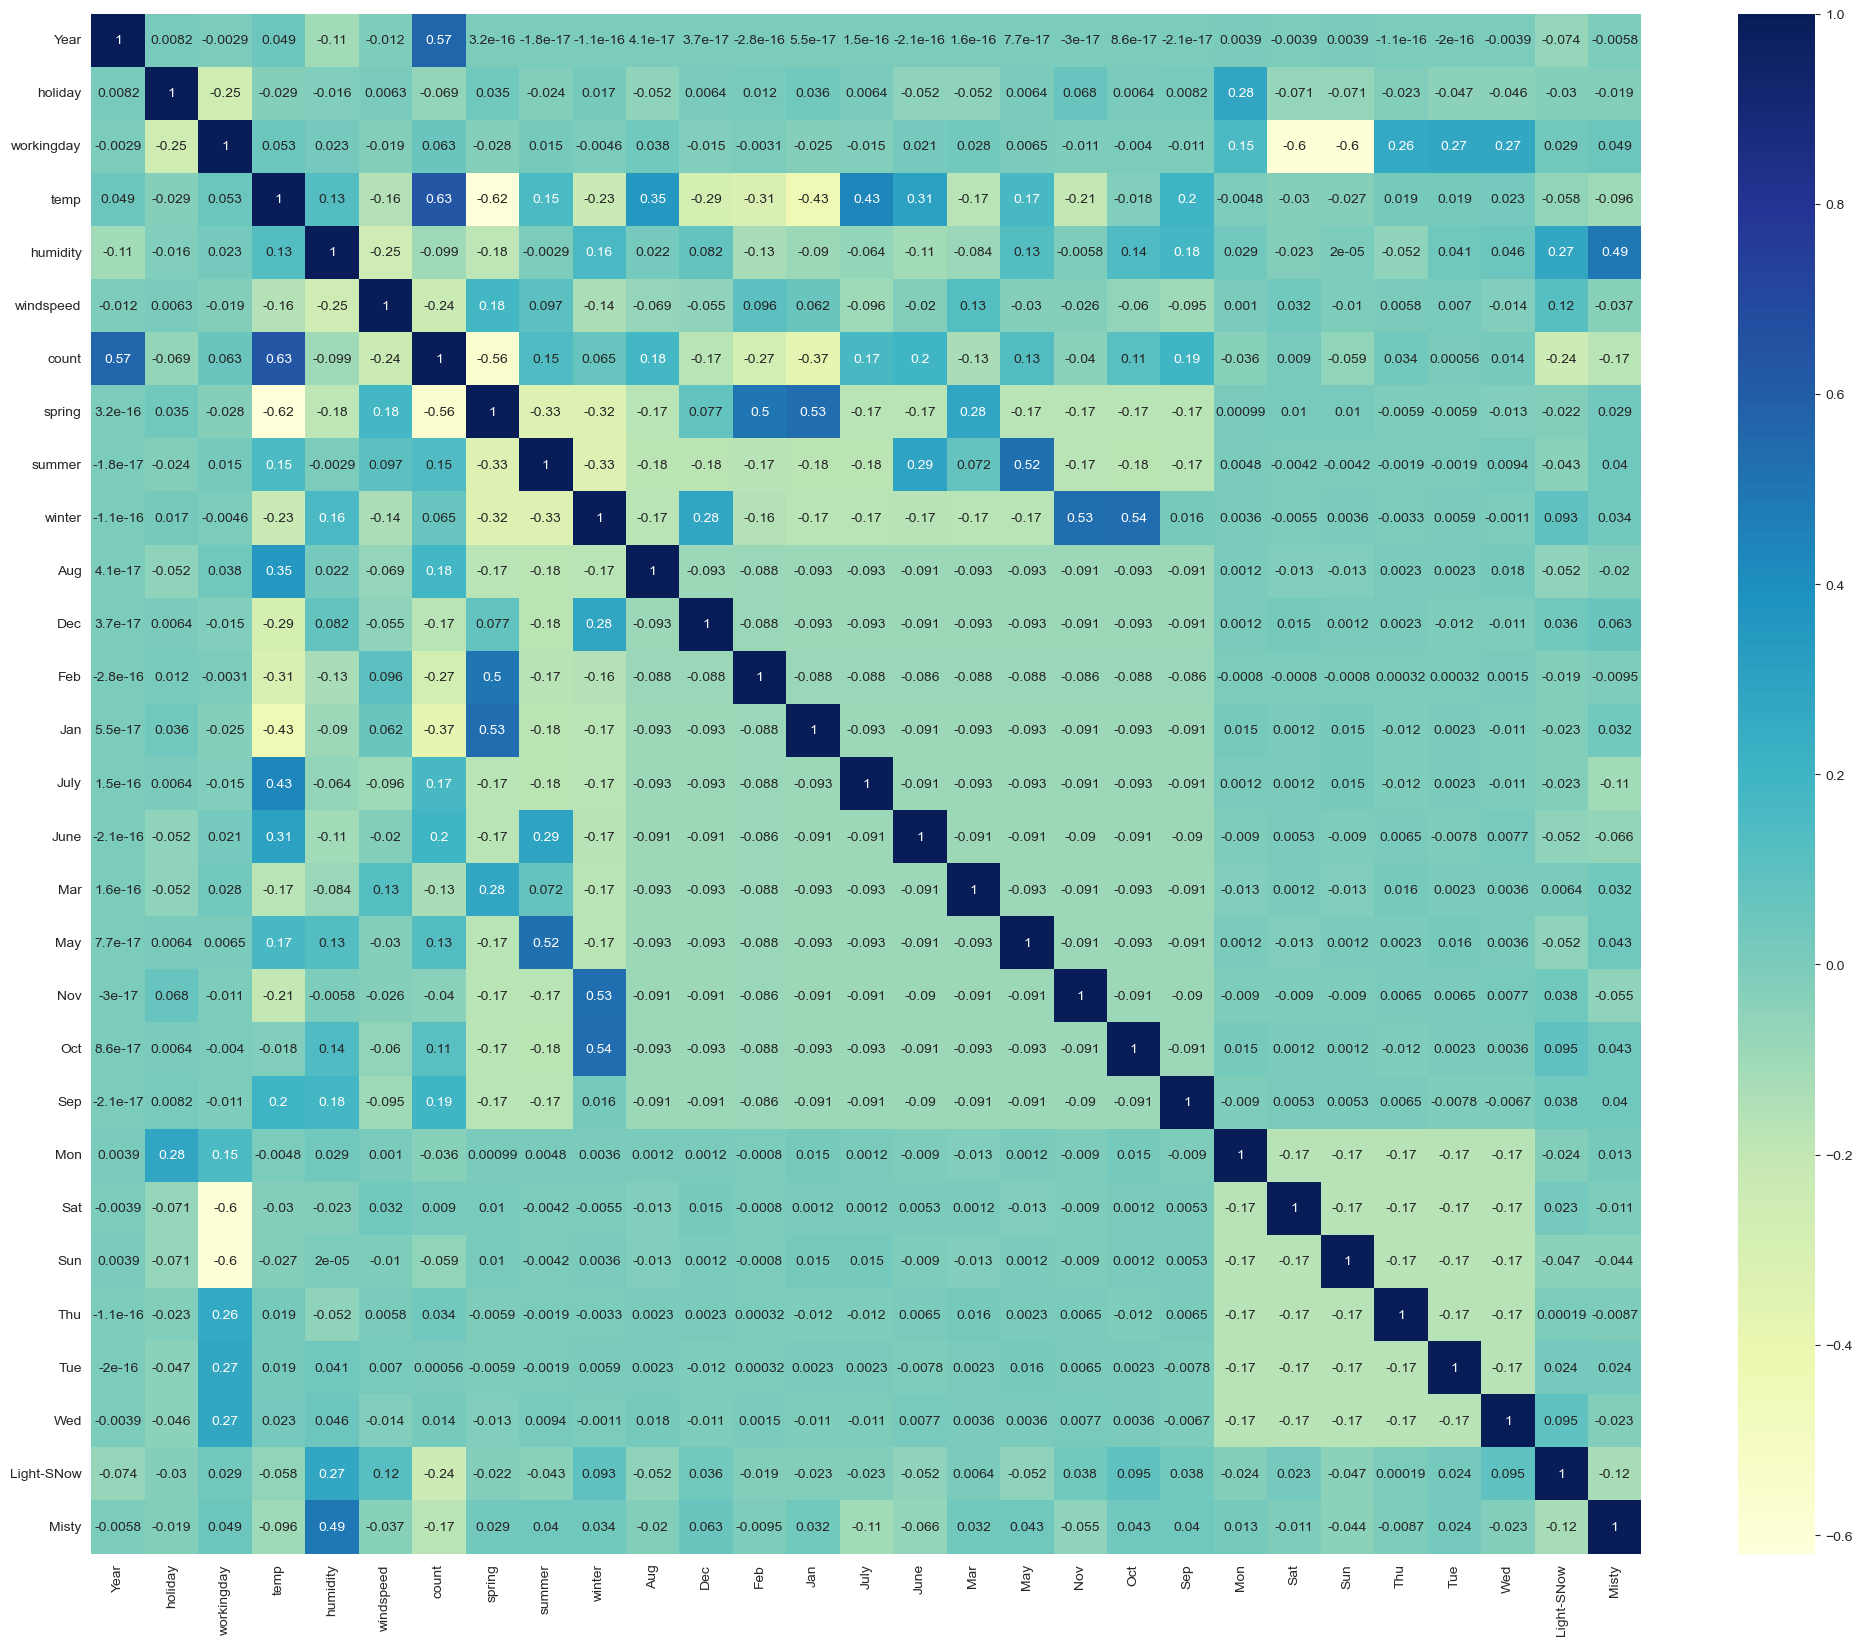

In [1214]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(df_day.corr(), cmap='YlGnBu', annot = True)
plt.show()

### Observation

- Target variable count has strong relationship with features like year, temperature.
- Bike rentals has good relationship with "Fall season" and "Summer season".
- Bike rentals have good relationship with months from July to October

Above data indicates that selected features have good influence on target variable and Liner Regression Model can be built.

## Splitting the Data into Training and Testing Sets

As We know, the first basic step for regression is performing a train-test split.

In [1215]:
# splitting the data into train and test sets
df_day_train, df_day_test = train_test_split(df_day, train_size = 0.7, random_state = 100)

In [1216]:
# inspect shape of sets
print(df_day_train.shape)
print(df_day_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [1217]:
#Instantiate the object
scaler = MinMaxScaler()

# Variables to be scaled
num_vars=['temp','humidity','windspeed','count']

#Fit on data
df_day_train[num_vars] = scaler.fit_transform(df_day_train[num_vars])
df_day_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-SNow,Misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [1218]:
#inspecting variables(min and max) after scaling
df_day_train.describe()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-SNow,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### All values are scaled to have values between 0 and 1.

## Model Building

As first step, We will divide training data into X and Y axis

In [1219]:
#Divide the data into X and y
y_train = df_day_train.pop('count')
X_train = df_day_train

### Automated Feature Selection 
### RFE( Recursive Feature Elimination)


There are multiple ways of selecting/rejecting features for model building. We are using LinearRegression function from SciKit Learn for its compatibility with RFE.

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [1220]:
# Instantiate linear regression object
linear_regression = LinearRegression()

# Train the model with training data
linear_regression.fit(X_train, y_train)

# Run RFE to select features
rfe = RFE(linear_regression, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [1221]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light-SNow', True, 1),
 ('Misty', True, 1)]

In [1222]:
# Selected columns for modelling
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Sat', 'Light-SNow',
       'Misty'],
      dtype='object')

In [1223]:
# Rejected columns
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [1224]:
# First, We will define some utility methods for repetitive operations

def build_model(X_train_rfe) :
    lm = sm.OLS(y_train,X_train_rfe).fit()
    print(lm.summary())
    return lm
    
def calculate_VIF(X_train_rfe) :
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
def drop_column(data_frame, column_name) :
    data_frame = data_frame.drop([column_name], axis = 1)
    return data_frame

In [1225]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        01:44:15   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

### As per summary above, We should consider multicollineanirty check
### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [1226]:
#Drop the constant
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

# calculate VIF for base case
calculate_VIF(X_train_rfe)

      Features    VIF
4     humidity  29.37
3         temp  17.78
2   workingday   5.31
5    windspeed   4.73
6       spring   4.53
8       winter   3.46
7       summer   2.85
14       Misty   2.29
0         Year   2.09
12         Sat   1.98
9          Jan   1.67
10        July   1.59
11         Sep   1.39
13  Light-SNow   1.24
1      holiday   1.18


###  Jan has high p-value dropping it

In [1227]:
#dropping holiday
X_train_rfe = drop_column(X_train_rfe, 'Jan')


In [1228]:
# Re build model
X_train_rfe = sm.add_constant(X_train_rfe)
build_model(X_train_rfe)

#Drop the constant
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

# re-calculate VIF
calculate_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        01:44:15   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.0

###  Dropping "holiday" and rebuilding

In [1229]:
#dropping fall
X_train_rfe = drop_column(X_train_rfe, 'holiday')


In [1230]:
# Re build model
X_train_rfe = sm.add_constant(X_train_rfe)
build_model(X_train_rfe)

#Drop the constant
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

# re-calculate VIF
calculate_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.54e-191
Time:                        01:44:15   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.036      6.472      0.0

###  Dropping "humidity" and rebuilding

In [1231]:
#dropping fall
X_train_rfe = drop_column(X_train_rfe, 'humidity')


In [1232]:
# Re build model
X_train_rfe = sm.add_constant(X_train_rfe)
build_model(X_train_rfe)

#Drop the constant
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

# re-calculate VIF
calculate_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          7.12e-189
Time:                        01:44:15   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

### Dropping "July" and rebuilding

In [1233]:
#dropping Oct
X_train_rfe = drop_column(X_train_rfe, 'July')


In [1234]:
# Re build model
X_train_rfe = sm.add_constant(X_train_rfe)
build_model(X_train_rfe)

#Drop the constant
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

# re-calculate VIF
calculate_VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.42e-188
Time:                        01:44:15   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.031      4.597      0.0

In [1235]:
#dropping windspeed
X_train_rfe = drop_column(X_train_rfe, 'windspeed')


In [1236]:
# Re build model
X_train_rfe = sm.add_constant(X_train_rfe)
linear_model_final = build_model(X_train_rfe)

#Drop the constant
X_train_rfe_f=X_train_rfe.drop(['const'],axis=1)

# re-calculate VIF
calculate_VIF(X_train_rfe_f)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.10e-182
Time:                        01:44:15   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0902      0.030      2.964      0.0

### Observations

- This model looks stable.
- The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
- The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
- R square value is 82.6 %
- Adjusted R square is 82.2 %
- VIFs are below 5 to meet the expectations

### Another model without "temp" feature, drops R square value drastically and We have already seen its positive correlation with target variable, We can reject that model.

### Residual Analysis of the train data

In [1237]:
# make prediction 
y_train_pred = linear_model_final.predict(X_train_rfe)

<Figure size 640x480 with 0 Axes>

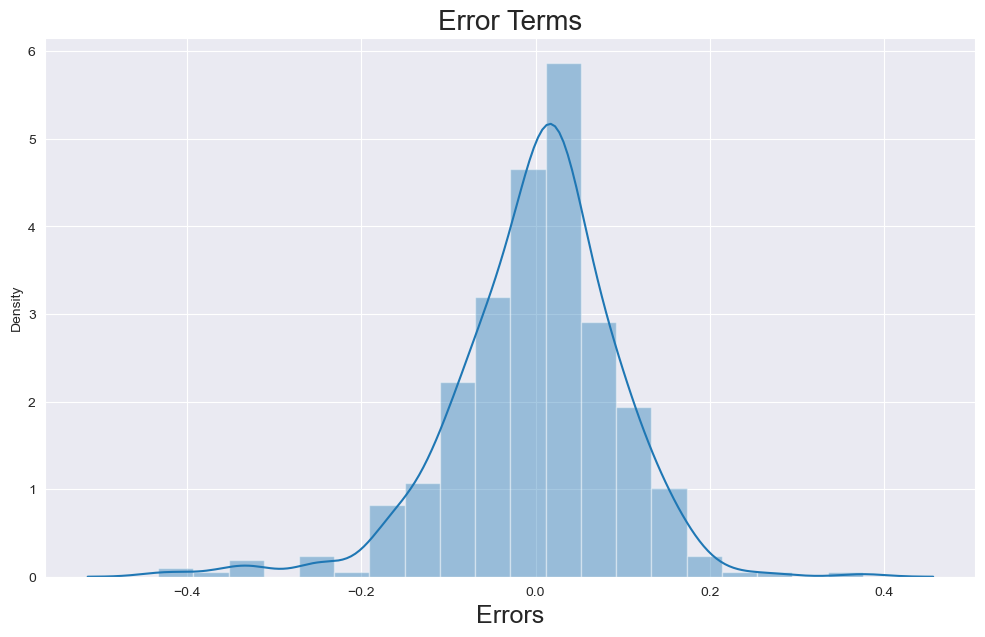

In [1238]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(12,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

### We can observe that error terms are normally disributed

### Visualise the variance

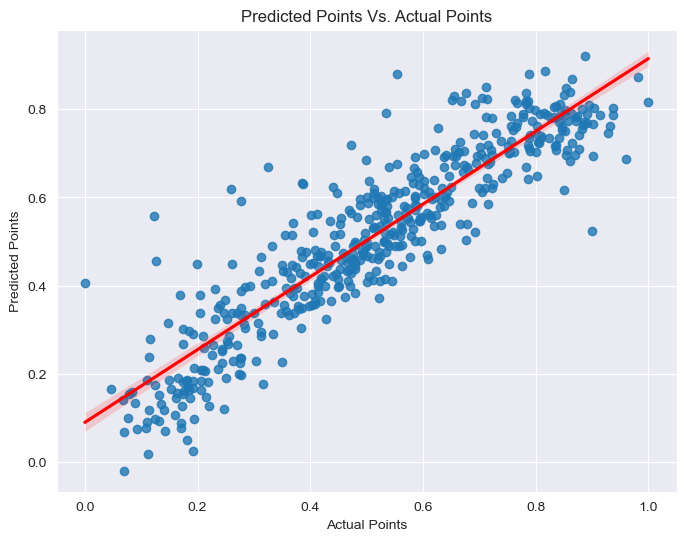

In [1239]:
plt.figure(figsize = (8,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color": "red"})
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

### We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

## Model Evaluation
### Apply scaling on test data set

In [1240]:
# categorical variables for scaling
num_vars = ['temp','humidity','windspeed','count']

# apply scaling
df_day_test[num_vars]=scaler.transform(df_day_test[num_vars])

y_test = df_day_test.pop('count')
X_test = df_day_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-SNow,Misty
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1241]:
X_test_sm = X_test_sm[X_train_rfe.columns]
X_test_sm

,const,Year,workingday,temp,spring,summer,winter,Sep,Sat,Light-SNow,Misty
184,1.0,0,0,0.831783,0,0,0,0,0,0,1
535,1.0,1,1,0.901354,0,1,0,0,0,0,0
299,1.0,0,1,0.511964,0,0,1,0,0,0,1
221,1.0,0,1,0.881625,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1,0.519232,0,0,1,0,0,0,0
127,1.0,0,0,0.584649,0,1,0,0,0,0,0
640,1.0,1,1,0.745598,0,0,1,0,0,0,1
72,1.0,0,1,0.331557,1,0,0,0,0,0,0


In [1242]:
# Predict the Price for Test Data using the Trainned Model
y_test_pred = linear_model_final.predict(X_test_sm)

y_test_pred.sample(5)

118    0.475461
705    0.558689
400    0.306512
114    0.534648
423    0.498855
dtype: float64

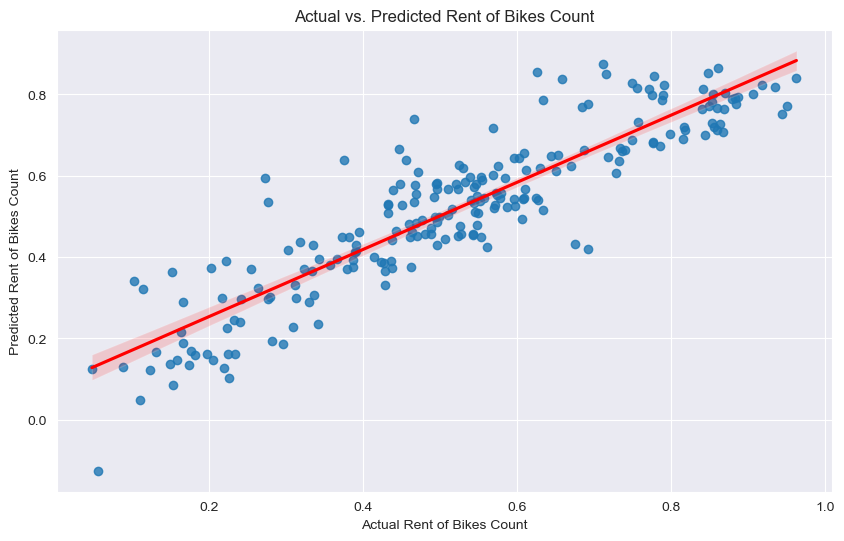

In [1243]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (10,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

In [1244]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8115083592040953

## Observation
- The Final Model accuray is around 82.6%, Which is a Good Score.
- R2 score of test data prediction is 81.1 %, which is close to training data prediction.
- The Model accuracy difference between the Train and Test Data is less than 2% which is very good.

## Final Equation
### count = 0.0902 + 0.4914×temp + 0.0916×Sep + 0.0645×Sat + 0.0527×summer + 0.0970×winter + 0.2334×Year + 0.0566×workingday − 0.03041×light-snow − 0.0786×misty − 0.065×spring

## Conclusion

- We have arrived at a model which has decent r2 score with test data.
- Variable temperature has strong linear relationship with target variable bike rentals.
- Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.
- it is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days.
- Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign of growing business.